In [1]:
import numpy as np
from misc_tools.print_latex import print_tex
import matplotlib.pyplot as plt

input example : 
>>> arr_T = np.array([[r'\vec{v}_1', r'\vec{v}_2']]).T
>>> print_tex(arr_T,'=', np.arange(1,5).reshape(2,-1)/4, r'; symbols: \otimes, \cdot,\times')
output: 


<IPython.core.display.Math object>

Jacobi iterations method is based on common and simple technique.
When we solve 
$$A\vec{x} = \vec{b}$$
we have to invert $A$
$$\vec{x} = A^{-1}\vec{b}$$
and inversion is costly operation, if done directly. 

Unless its a diagonal matrix $D$ , since inversion reduces to setting all diagonal elements to

$$D^{-1}_{ij} = \frac{1}{D_{ij}}$$

This is the main idea. We split A into diagonal and remaining part
$$A = D + E$$
and can solve 
$$A\vec{x} = (D+E)\vec{x} = \vec{b}$$
$$D\vec{x} = -E \vec{x}  + \vec{b}$$
$$\vec{x} = \underbrace{-D^{-1}E}_{B} \vec{x}  + \underbrace{D^{-1}}_{\vec{z}}\vec{b}$$
$$\vec{x} = B \vec{x}  + \vec{z}$$ 
This forms a basis for iteration
$$\boxed{\vec{x}_{i+1} = B \vec{x}_i  + \vec{z}}$$ 

We can see that $B$ is applied to $\vec{x}$ repeatedly. Knowing about spectral radius $\rho(B)$ might indicate how iterations will progress, whether result converges. Ideally we want small spectral radius.

[eigenproblem_notes.ipynb](../Eigenproblem/eigenproblem_notes.ipynb)

error term shows how farm we are from solution $\vec{x}$
$$\boxed{\vec{e}_i = \vec{x}_i - \vec{x}}$$
and residual shows  'how' far current guess is from true solution
$$\boxed{\vec{r}_i = b - A\vec{x}_i}$$

$$A \vec{e}_i = A \vec{x}_i - A \vec{x}$$
$$ = A \vec{x}_i - \vec{b} = - \vec{r}_i $$

$$\boxed{\vec{r}_i = - A \vec{e}_i }$$

in [Notes_Steepest_Descent.ipynb](Notes_Steepest_Descent.ipynb)
we saw that residual points to steepest descent.

Otherwise meaning of last expression is not yet clear to me. Its only clear that we want to reduce both residual and error.

$$\vec{x}_{i+1} = B \vec{x}_i  + \vec{z} $$
$$ = B(\vec{e}_i + \vec{x}) + \vec{z}$$
$$ = \underbrace{B\vec{x} + \vec{z}}_{\vec{x}} + B\vec{e}_i$$ 
$$ =  \vec{x} + B\vec{e}_i$$

$$\vec{x}_{i+1} =  \vec{x} + B\vec{e}_i$$
$$\underbrace{\vec{x}_{i+1} - \vec{x}}_{\vec{e}_{i+1}}=  B\vec{e}_i$$
$$\boxed{\vec{e}_{i+1} =  B\vec{e}_i}$$

So we see if the spectral radius of B is less then one $\rho(B) < 1$, then we can expect convergence independent of initial $\vec{x}_0$!

actual rate of convergence will depend on $\rho(B)$

In [47]:
A = np.array([[3,2],[2,6]])
b = np.array([[2,-8]]).T

diagA = np.diag(A)
D = np.diag(diagA)
E = A - D
D_inv = np.diag(1/diagA)
B = -D_inv @  E

z = D_inv @ b
print_tex('B = ', B,';z= ', z)

<IPython.core.display.Math object>

Text(0, 0.5, 'residual')

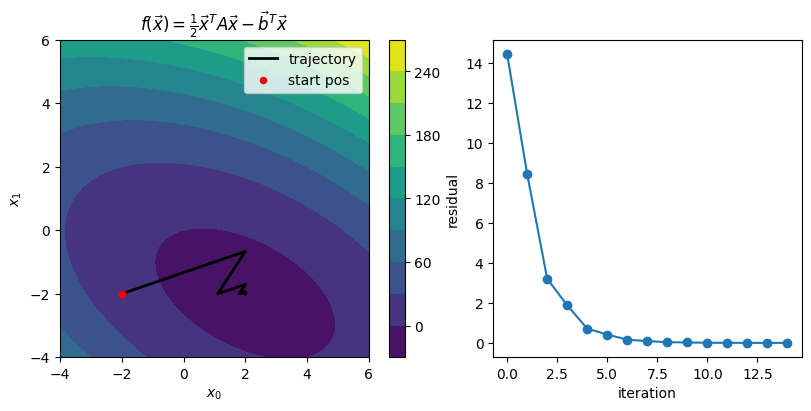

In [58]:
T = lambda x: np.moveaxis(x, -1, -2) 

def f(x):
    return (0.5*T(x) @ A @ x - T(b) @ x)

N_samples = 200
dom = (-4,6)
dom1 = np.linspace(*dom, N_samples)
X,Y = XY = np.meshgrid(dom1,dom1)
domain_xy = np.stack(XY, axis = -1)[...,None]
obj_fn = f(domain_xy).reshape(N_samples,N_samples)
fig, axs = plt.subplots(1,2, figsize = (2*4, 4), layout='constrained')

c = axs[0].contourf(X,Y, obj_fn, extent = [*dom*2],levels = 10)
plt.gca().set_aspect(1)
plt.colorbar(c)


xi = np.array([[-2,-2]]).T

i = 0
xs = [xi]
r = np.linalg.norm(b - A @ xi)
res = [r]
while r > 0.001:
    xi = B @ xi + z
    xs.append(xi.copy())
    i += 1
    r = np.linalg.norm(b - A @ xi)
    res.append(r.copy())

axs[0].plot(*np.array(xs).T.reshape(2,-1), color = 'k', lw = 2, label = 'trajectory')
axs[0].scatter(*xs[0], c = 'r', s = 20, zorder = 2, label = 'start pos')
axs[0].set_xlabel(r'$x_0$')
axs[0].set_ylabel(r'$x_1$')
axs[0].set_title(r'$f(\vec{x}) = \frac{1}{2} \vec{x}^T A \vec{x} - \vec{b}^T\vec{x}$')
axs[0].legend();

axs[1].plot(res)
axs[1].scatter(range(len(res)),res)
axs[1].set_xlabel('iteration')
axs[1].set_ylabel('residual')

Tbh i dont see a point of plotting errors and their projections to eigenbasis of $B$.

Figure 13 in https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf shows that they shrink

In [61]:
eig_system_d = np.linalg.eig(B)._asdict()
v1,v2 = eig_system_d['eigenvectors'].copy()
l1,l2 = eig_system_d['eigenvalues']
print_tex(r'\rho(B) = ', max(l1,l2))

<IPython.core.display.Math object>